In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from ultralytics import YOLO
from PIL import Image 


In [2]:
def render_images(image_paths, title):
    """
    Render a list of images using Matplotlib.

    Parameters:
    - image_paths (list): List of file paths to the images to display.
    """
    if not image_paths:
        print("No images to display.")
        return

    # Determine the grid size for subplots (e.g., 2 columns)
    num_images = len(image_paths)
    cols = 2
    rows = (num_images + cols - 1) // cols  # Calculate rows needed
    
    # Create a figure with dynamic size
    fig, axes = plt.subplots(rows, cols, figsize=(10, 5 * rows))
    axes = axes.flatten() if num_images > 1 else [axes]  # Handle single image case
    fig.suptitle(title)

    # Loop through the image paths and render each image
    for i, image_path in enumerate(image_paths):
        try:
            img = mpimg.imread(image_path)
            axes[i].imshow(img)
            axes[i].set_title(os.path.basename(image_path), fontsize=10)
            axes[i].axis('off')  # Hide axes
        except Exception as e:
            axes[i].text(0.5, 0.5, "Error loading image", fontsize=12, ha='center')
            axes[i].axis('off')
            print(f"Error displaying {image_path}: {e}")

    # Hide any unused subplot axes
    for j in range(len(image_paths), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [3]:
# Load the YOLO model
yolomodel = YOLO('yolov8n.pt')  # YOLOv8 nano for speed, or 'yolov8s.pt' for more accuracy


In [4]:
# Define a function to check if an image shows the entire outside of a car
def is_full_car(image_path):
    TRESHOLD_RATIO = .25
    MINIMUM_CONFIDENCE_SCORE = 0.50
    img = Image.open(image_path) 
    # get width and height 
    width = img.width 
    height = img.height 
    # Run the YOLO model
    results = yolomodel(image_path)
    print(width, height)
    hits = ['car', 'truck', 'vehicle']
    for result in results:  # Iterate through each image's result
        for box, cls_id, confidence in zip(result.boxes.xyxy, result.boxes.cls, result.boxes.conf):
            class_name = result.names[int(cls_id)]  # Get class name
            # Check if the detected object is a car and if the bounding box is large enough
            if class_name in hits and confidence >= MINIMUM_CONFIDENCE_SCORE:
                # Here you can add logic to check the size of the box
                # For example, you could check if the box covers a significant portion of the image
                # Assuming box is in the format [x_min, y_min, x_max, y_max]
                box_width = (box[2] - box[0]) / width
                box_height = (box[3] - box[1]) /height
                if box_width * box_height > TRESHOLD_RATIO:
                    return True
    return False

dir = r"C:\imdir\saab"
models = os.listdir(dir)
model = random.choice(models)
d = os.path.join(dir, model)
listing = random.choice(os.listdir(d))
listingdir = os.path.join(dir, model, listing)
print(model, listing)
keep = []
reject = []

for root, dirs, files in os.walk(listingdir):
    for file in files:
        image_path = os.path.join(root, file)
        # Check if the image shows the entire outside of a car
        if is_full_car(image_path):
            keep.append(image_path)
        else:
            reject.append(image_path)


96 abfa4ac5-fe4e-4705-a189-f04ada376fbc

image 1/1 C:\imdir\saab\96\abfa4ac5-fe4e-4705-a189-f04ada376fbc\1066a741-8d1d-459f-864d-f5b7ae38d93b.jpg-750x564.jpg: 480x640 1 car, 166.4ms
Speed: 0.0ms preprocess, 166.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
750 562

image 1/1 C:\imdir\saab\96\abfa4ac5-fe4e-4705-a189-f04ada376fbc\2e6b9af3-a4b5-4777-966a-16e2aef63880.jpg-750x564.jpg: 640x480 1 car, 116.8ms
Speed: 0.0ms preprocess, 116.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
423 564

image 1/1 C:\imdir\saab\96\abfa4ac5-fe4e-4705-a189-f04ada376fbc\56104321-ae2e-4041-a106-c9b7821129df.jpg-750x564.jpg: 480x640 2 cars, 99.6ms
Speed: 0.0ms preprocess, 99.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
750 562

image 1/1 C:\imdir\saab\96\abfa4ac5-fe4e-4705-a189-f04ada376fbc\631bea90-6259-4f5a-944b-38e605d58e03.jpg-750x564.jpg: 480x640 1 car, 99.4ms
Speed: 1.5ms preprocess, 99.4ms inference, 0.0ms postprocess per image at sh

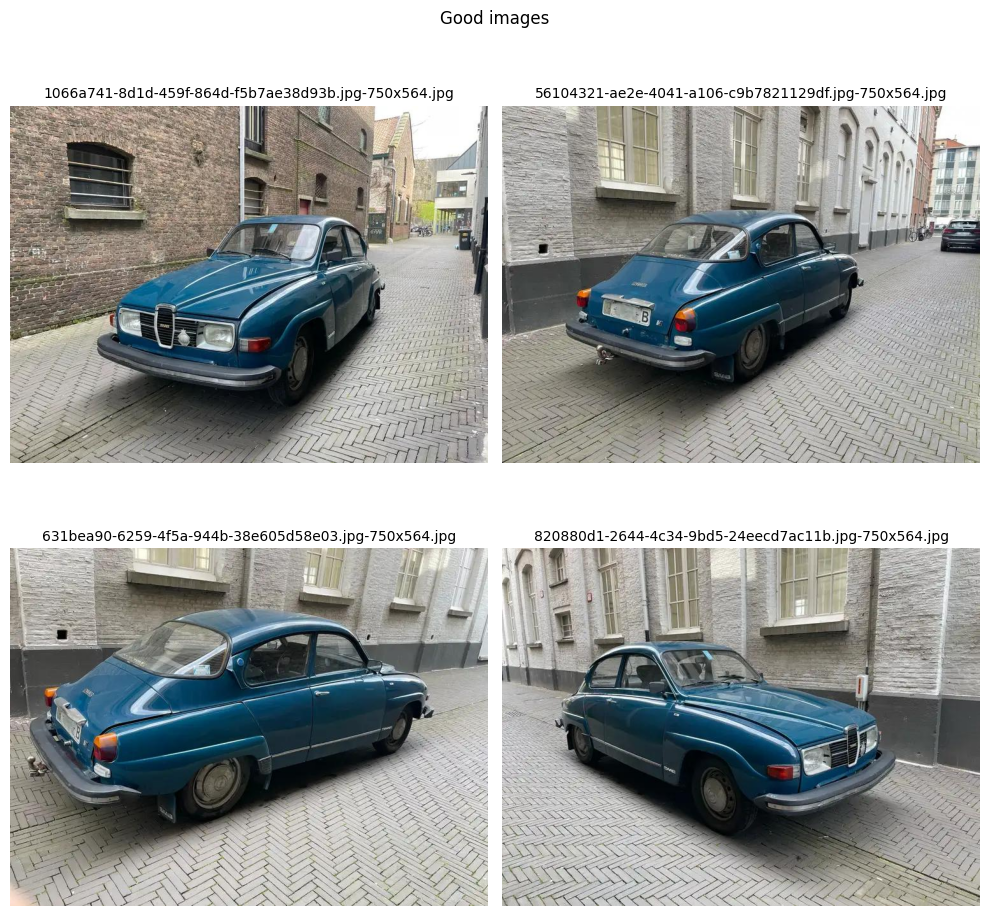

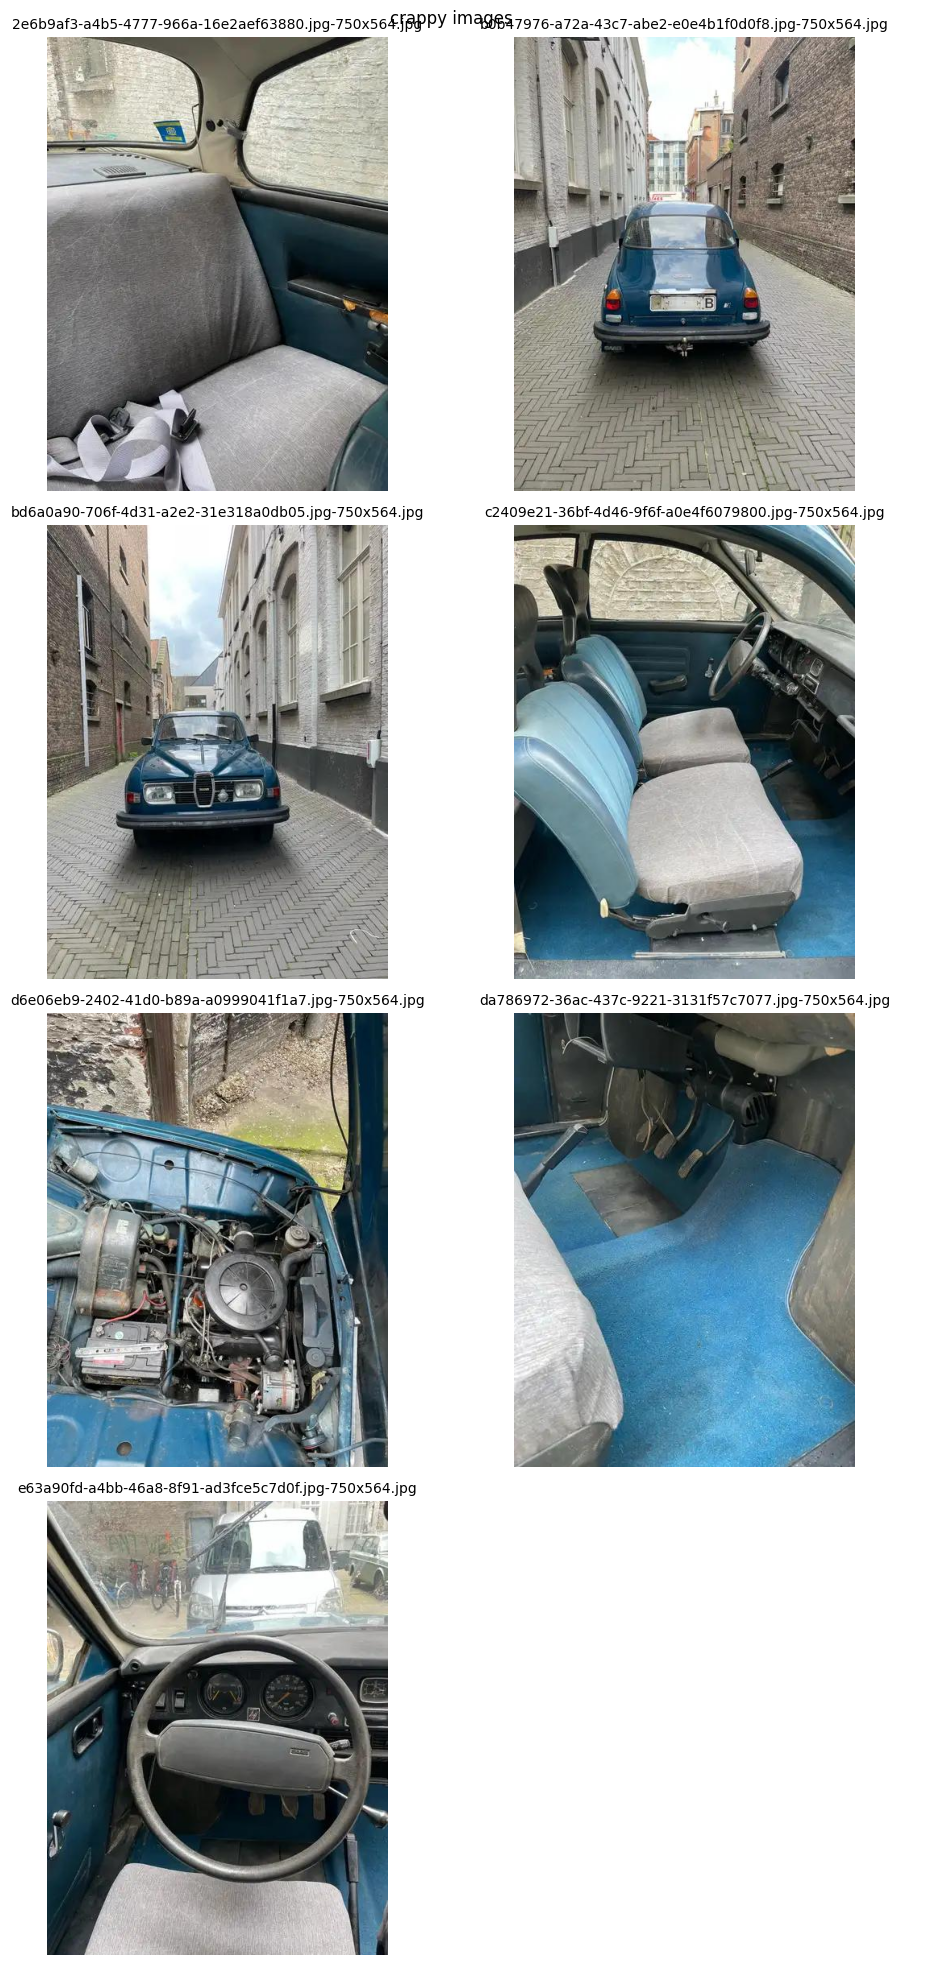

In [5]:
assert(len(keep) + len(reject) == len(files))

render_images(keep, "Good images")
render_images(reject, "crappy images")



image 1/1 C:\imdir\saab\96\abfa4ac5-fe4e-4705-a189-f04ada376fbc\2e6b9af3-a4b5-4777-966a-16e2aef63880.jpg-750x564.jpg: 640x480 1 car, 94.5ms
Speed: 3.0ms preprocess, 94.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
tensor([  0.0000,   0.0000, 422.0692, 553.0810])


C:\Users\Frede\AppData\Local\Temp\ipykernel_44660\4293803719.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('hsv', num_classes)


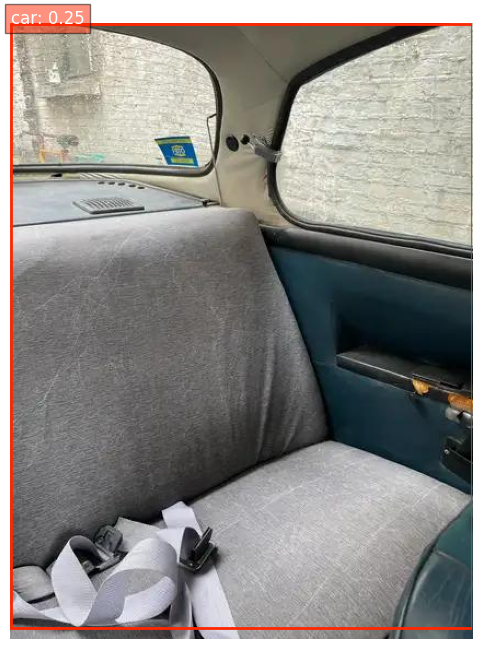


image 1/1 C:\imdir\saab\96\abfa4ac5-fe4e-4705-a189-f04ada376fbc\56104321-ae2e-4041-a106-c9b7821129df.jpg-750x564.jpg: 480x640 2 cars, 93.4ms
Speed: 0.0ms preprocess, 93.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
tensor([ 98.4952, 163.5936, 566.7907, 437.3875])
tensor([688.0172, 175.3090, 749.6310, 232.7036])


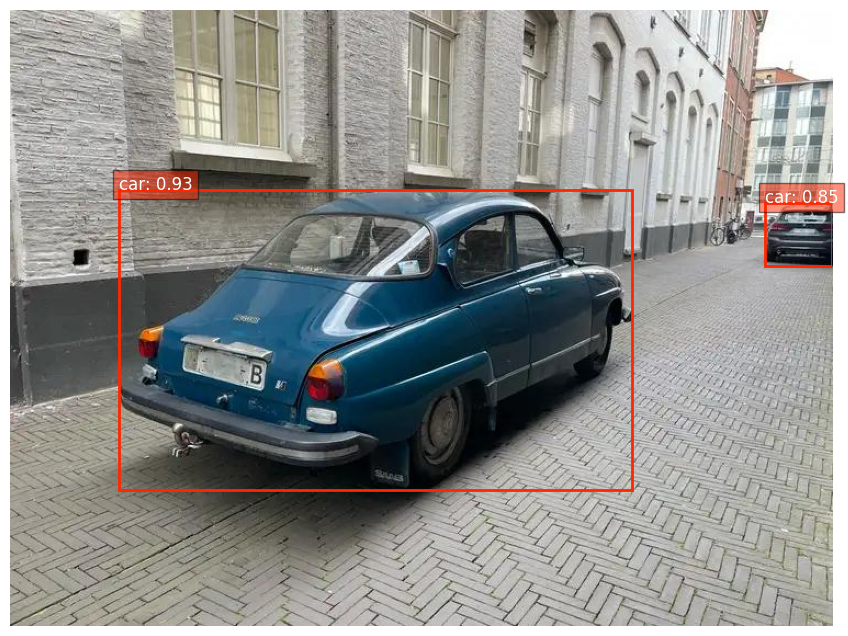


image 1/1 C:\imdir\saab\96\abfa4ac5-fe4e-4705-a189-f04ada376fbc\631bea90-6259-4f5a-944b-38e605d58e03.jpg-750x564.jpg: 480x640 1 car, 82.4ms
Speed: 1.8ms preprocess, 82.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
tensor([ 25.1131,  93.6046, 664.7513, 433.9720])


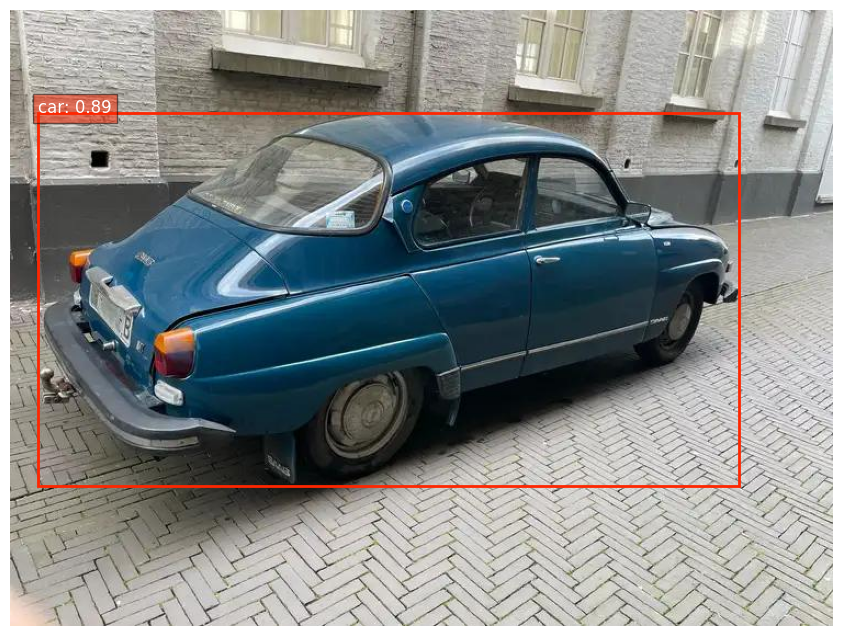

In [7]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2  # For reading the image

def generate_color_map(num_classes):
    """Generate a color map for the given number of classes."""
    colors = plt.cm.get_cmap('hsv', num_classes)
    return [colors(i) for i in range(num_classes)]

def visualize_detections(image_path, results):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    # Create a figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image)

    # Generate a color map for the detected classes
    num_classes = len(results[0].names)  # Assuming all results have the same class names
    color_map = generate_color_map(num_classes)

    # Iterate through the detection results
    for result in results:
        for box, cls_id, score in zip(result.boxes.xyxy, result.boxes.cls, result.boxes.conf):
            print(box)
            # Extract box coordinates
            x_min, y_min, x_max, y_max = box
            class_name = result.names[int(cls_id)]  # Get class name
            confidence = score  # Confidence score

            # Choose a color for the class
            color = color_map[int(cls_id)]

            # Create a rectangle patch
            rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                     linewidth=2, edgecolor=color[:3], facecolor='none')  # Use RGB color
            ax.add_patch(rect)

            # Prepare the label with class name and confidence
            label = f"{class_name}: {confidence:.2f}"
            ax.text(x_min, y_min, label, fontsize=12, color='white', bbox=dict(facecolor=color[:3], alpha=0.5))

    # Show the image with detections
    plt.axis('off')  # Hide the axis
    plt.show()

# Example usage
issues = [reject[0], keep[1], keep[2]]
for issue in issues: 
    results = yolomodel(issue)  # Get the results from the YOLO model
    visualize_detections(issue, results)